In [1]:
import h5py


In [2]:
filename = "L-L1_GWOSC_O2_4KHZ_R1-1164689408-4096.hdf5"
f = h5py.File(filename, 'r')

In [3]:
list(f.keys())

['meta', 'quality', 'strain']

In [4]:
for i in f['meta']:
    print(i,"   =   ",str(f['meta/'+i][()]))

Description    =    b'Strain data time series from LIGO'
DescriptionURL    =    b'http://www.gw-openscience.org/'
Detector    =    b'L1'
Duration    =    4096
FrameType    =    L1_CLEANED_HOFT_C02
GPSstart    =    1164689408
Observatory    =    b'L'
StrainChannel    =    L1:DCH-CLEAN_STRAIN_C02
Type    =    b'StrainTimeSeries'
UTCstart    =    b'2016-12-02T04:49:51'


In [5]:
for i in f['quality']:
    print(i)

detail
injections
simple


In [6]:
for i in f['strain']:
    print(i)

GWOSCmeta
Strain


In [134]:
f['strain/GWOSCmeta'][()]

b'GWOSC-4KHZ_R1_STRAIN'

In [174]:
for i in f['strain/Strain'][1:10]:#to see if the data has been extracted
    print(i)

-2.012991038259634e-18
-2.6343155852303222e-18
-2.6439362869121887e-18
-2.1423943258310287e-18
-1.4674157368630475e-18
-9.21283339340593e-19
-8.146014136981423e-19
-1.3178047406134433e-18
-2.159509189305259e-18


In [90]:
import matplotlib
import matplotlib
import numpy as np
import pylab

In [10]:
a=f['strain/Strain']

In [30]:
print(f['meta/Duration'][()])
print(len(a))


4096
16777216


In [31]:
Time=4096/16777216
Time

0.000244140625

In [75]:
freq=1/Time
freq=int(freq)
print(freq)#sampleing freq
x=np.arange(0,4096,Time)
len(x)

4096


16777216

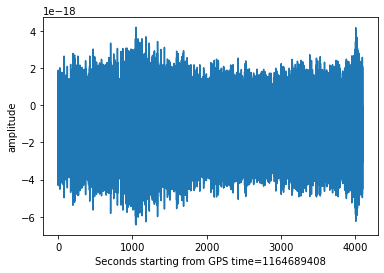

In [91]:
import matplotlib.pyplot as plt
plt.plot(x,f['strain/Strain'])
plt.ylabel('amplitude')
plt.xlabel('Seconds starting from GPS time='+str(f['meta/GPSstart'][()]))
plt.show()


In [87]:
from scipy import signal

In [147]:
spectra, freqs =matplotlib.mlab.psd(x=f['strain/Strain'], NFFT=4*4096, Fs=4096, detrend=None, window=None, noverlap=None, pad_to=None, sides="twosided", scale_by_freq=None)

[]

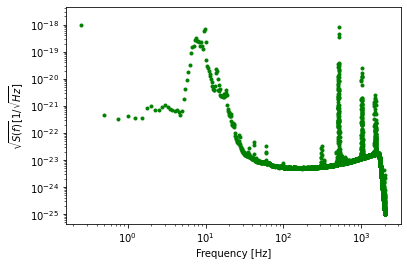

In [170]:
pylab.loglog(freqs,numpy.sqrt(spectra),"g.")
pylab.xlabel("Frequency [Hz]")
pylab.ylabel("$\sqrt{S(f)}$" + "$ [ 1/\sqrt{Hz}  ] $")
pylab.plot()
